# 洛杉矶房价预测

### 一、理论说明

#### (一)、结构化回归问题-提纲
1. 企业市值预估--企业报表
2. 金融反欺诈--金融信息表
###### 常见的结构化数据源：CSV、Table、Excel、DataBase
###### 涉及的算法：
1. 线性回归类：朴素线性回归、lasso、Ridge、ElasticNet
2. 树模型类：

 A. 决策树类：ID3、C4.5、CART。
 
 B. 集成型决策树类：Bagging、Boosting、GBDT、RF、XGBoost、AdaBoost、Stacking、Voting
3. 神经网络类：全连接神经网络（FC）
4. 基础理论：反向传播、信息论、神经网络的数学基础和优化问题
5. 数据挖掘和特征工程：EDA(探索性数据分析)

#### (二）、结构化分类问题-提纲
1. 典型数据集：Titanic数据集、Iris数据集、Tips数据集
2. 达成目标：如何评测你的分类模型、特征工程
3. 基础算法：线性分类、支持向量机、基于统计(朴素贝叶斯)、基于几何分类(KNN)、集成学习(Stacking、Bagging、Boosting、Voting)

#### (三)、计算机视觉--图像分类
1. 典型数据集：MNIST/CIFAR-10/CIFAR-100/CATS VS DOGS
2. 基础理论：CNN、AlexNet、VGG、GooleNet、leNet、ResNet、MobileNet、SqueezNet、ShuffleNet
3. 典型应用场景：人脸识别、视频分类(鉴黄)、农作物分类、肺结核分类、户型图分类、垃圾分类......

#### (四)、计算机视觉--图像检测
###### 对于多个物体的识别，和多个物体所在位置的定位
1. 典型数据集：Pascal VOC、COCO
2. 基础理论：Sliding-Window、RCNN、Fast-RCNN、Fasterer-RCNN、SSD、Yolo、RetinaNet、RefinaNet、RefineDet
3. 典型的应用场景：人脸识别--人脸检测、行人识别--行人检测、病灶识别--病灶检测

#### (五)、非结构化回归问题-提纲
1. 人脸识别--图片
2. 声音识别--声音片段

### 二、人工智能PipeLine

人工智能--基于数学架构的算法方法论；

人工智能--没有“人工”就没有“智能”；

###### (第一步)、人工智能--来源：数据。数据分为Numberical(连续性的数值型数据)和Categorial(离散的类型数据)

###### (第二步)、数据--来源：数据采集：Scrapy、phatom.js、ffmmpeg......

###### (第三步)、数据--过程：ETL,将数据变成结构化的数据并进行存储及其计算--Hadoop、Spark、Airflow、ElasticSearch......  
1. 起点：原始数据
2. 处理：并行化处理
3. 终点：数据仓库--PostgreSQL、Mysql、DFS、Hive、hdfs......

######  (第四步)、数据--整理：数据EDA、数据挖掘

######  (第五步)、数据--标注：人工标注系统--人工的体现

######  (第六步)、模型--训练与评测：Caffe、MxNet、DarkNet、TensorFlow、Pytorch。
           评测是决定模型好坏的关键。
######  (第七步)、模型--工程：模型压缩、平台转换--MInic、Distilling、NNIE、TensorRT、NCNN、Int8定点化
######  (第八步)、模型--应用集成
######  (第九步)、模型--数据回流：数据回流(回到第一步)

### 三、baseLine代码

In [1]:
# 导入第三方库
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 读取数据
train = pd.read_csv('./data/house_price.csv')

###### 含有空值的数据集对于算法有什么影响？
1. SVM、神经网络、Lasso Regression对空值没有容忍性，因为这三种模型属于计算性算法，输入都应该是数字。
2. 树模型本质上属于对于高维空间各个维度进行离散分割，对于空值具有容忍性，数据的填充会成为第一个步骤。
3. 根据缺失率的分析，可以选择不同的填充方案  
    A、缺失率大于80%的列，可以选择去掉，原因是缺失值可能引入更大的噪声--(可能缺失是合理的，但是去掉之后，其实去掉了更多的有效数据)  
    B、使用平均数、中位数、众数(离散型数据)进行填充。  
    C、粗填充绝对不是最终的填充方案，但是从算法迭代的角度，需要快速形成一个可被学习的训练集，所以优先选择快速填充。  
    D、粗填充是为了跑第一个baseline算法而使用。  
4. 不同类型的数据填充  
 （一）、 连续的数值型数据填充   
    A、均值填充  
    B、中位数填充  
    C、高斯填充  
    D、内在关联填充-EDA的范畴，最有效的填充。 
  （二）、离散型的类型数据填充  
    A、高频填充  
    B、内在关联填充

In [3]:
# 统计数据的缺失值率
null_rate = train.isnull().sum()
null_rate = null_rate/len(train)
#筛选缺失率较大的数据
null_rate = null_rate[null_rate>0]
null_rate.sort_values()
train_1 = train
#连续型的数值填充（中位数填充）
train_1=train_1.fillna(train_1.median())
#离散型的类型填充（朴素办法：将NaN数据使用None数据类型进行填充或者是'NA'）
train_1=train_1.fillna('None')

In [4]:
#BaseLine模型的训练
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.6,learning_rate=0.01,max_depth=8,n_estimators=3700,subsample=0.7,random_state=123)

###### 训练集的准备
1. TrainSet：通常是有Label的数据集
2. ValidateSet：通常也是有Label的，但是不参与训练，但是会在训练中对于训练过程的模型进行评测，来衡量和记录Test Error和Test Loss的变化（valid-acc、valid-loss）
3. TestSet：有可能没有Label。

In [5]:
# 将Pandas中的Object数据进行数值化，且离散的数据进行0/1二值化
# 首先，Object类型的数据，至少应该被数值（离散型的数值）所代替，因为对于计算型的模型，需要用到数值特征
# 其次，用来描述类型的数值本身是没有大小关系的，但是这些数值引入到计算型的模型中（线性类、神经网络类、SVM类）就会引入噪声，因此还要对于离散的数据进行0/1数值化
# 代码如下：
X = pd.get_dummies(train_1)
# X中剥离target，并将Target分离成y
y = X['SalePrice']
X = X.drop(['Id','SalePrice'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)


In [6]:
# 使用XGBRegressor进行回归
xg_reg.fit(X_train,y_train)

/Users/jaydenwangwei/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:44:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=3700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [7]:
#使用Test数据集进行测试
pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
logrmse = np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
logrmse

0.11374276392136894

### 数据EDA的入门
1. 数据属性分布分析（属性本身的概率密度分析/正态分布分析），当数据是片太过于严重的时候，可能会造成计算时精度的损失，必要的时候可以进行标准化的操作
2. 相关性分析(特征列跟目标之间的关系)--相关性系数--corerelationship
3. 缺失属性的合理化填充
4. 构造属性和特征工程

#### 相关性分析  
相关性系数 r in [-1,+1]
1. |r|>0.95,显著关系，相互之间的关系具有较强的关联，甚至于简单的线性计算关系或者同构关系，如果是重合度很高的数据，可以考虑去掉其中一个，或者进行融合。
2. |r|>=0.8,强相关
3. |r|>=0.5,中等相关
4. |r|>=0.3,弱相关，特征属性有待挖掘，可以通过特征工程对特征进行优化或者合并构造
5. |r|<0.3,极弱相关，可以考虑去掉

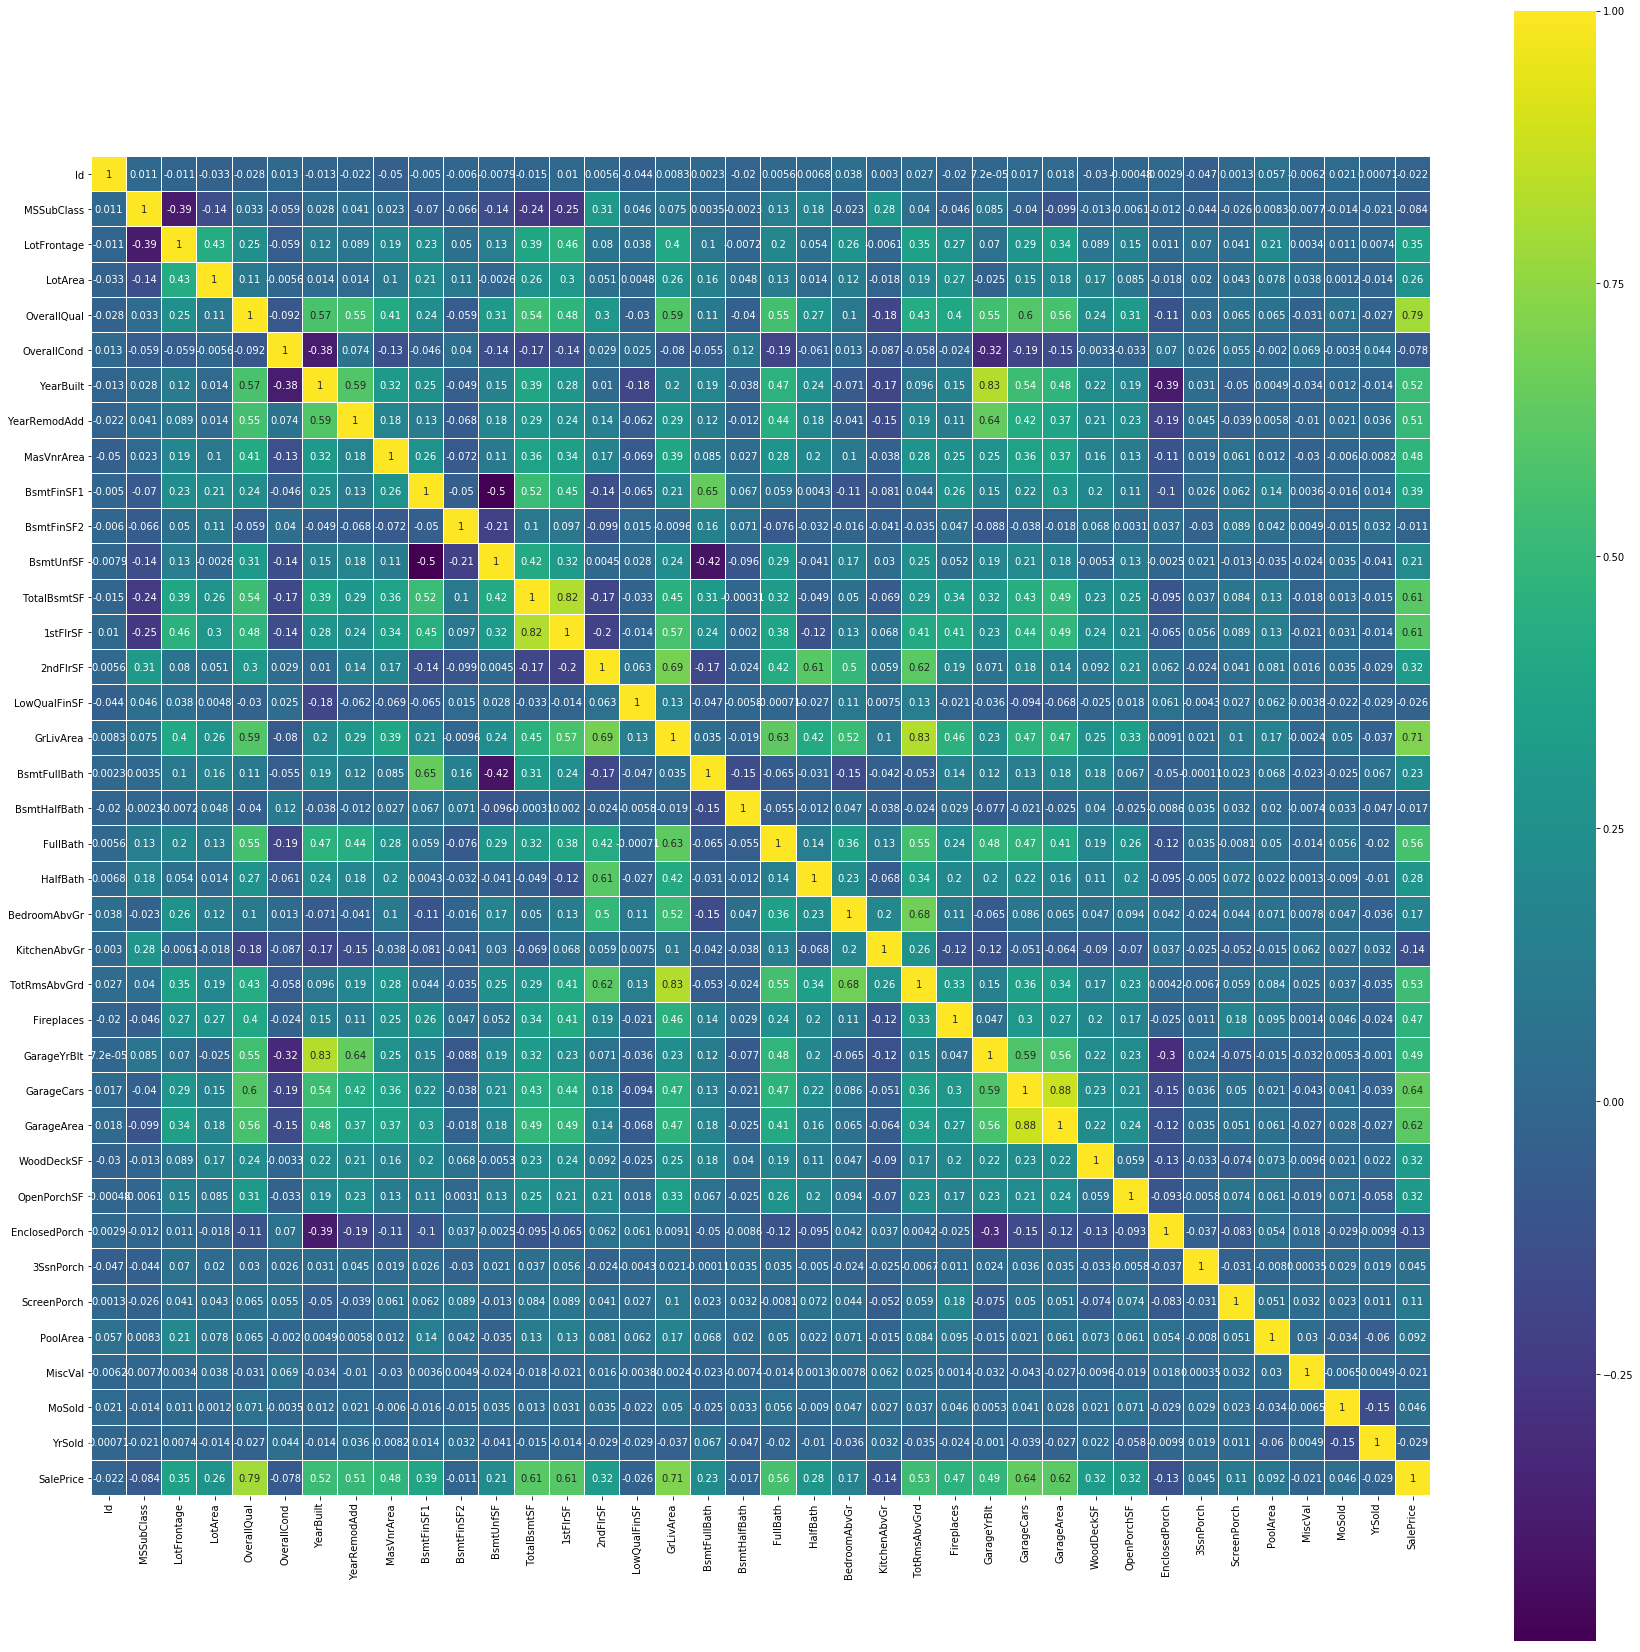

In [4]:
# 属性分布相关性热力图
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),linewidths=0.01,square=True,cmap='viridis',annot=True)

In [6]:
# 与目标特征的相关性
corr=train.corr()['SalePrice']
#中等以及以上的相关性的特征都有哪些
corr[corr>0.5].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64